<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020_12_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GEOL557 Week 7 Group Project-Documentation

##Characterization of the Lunar LCROSS volatile measurements and adjacent area

Britt Duffy Adkins, Hunter Danque, Deniz Donmez (December 13, 2020)

##Abstract

The LCROSS impact in the Cabeus crater and spectroscopic analysis of the ejecta plume is the only "ground truth" of volatiles in Lunar Permanently Shadowed Regions (PSRs). As such, it is used as a baseline for molecular abundance in PSRs at both lunar poles. Our goal is to take a more conservative approach and map the critical environmental characteristics of PSRs, Illumination, Temperature, Topography, and distance weighting from the LCROSS site to have a semi-quantitative view of how far that "one" measurement can be extrapolated within the Cabeus crater. 
We calculated and plot the Molecular and Elemental abundance from the LCROSS spectroscopic measurements. Most lunar resource work focuses on the water observed (~5% by weight) and Hydrogen and Oxygen for rocket fuel use. We want to show there are other valuable elemental resources observed in the ejecta plume, although some valuable elements like Carbon are in multiple molecules.


#Introduction

Our project aimed to characterize the molecular composition and relative frequency of elements that were detected at and around the LCROSS impact site in the Cabeus crater. We were able to build upon the data collected from a 2010 paper by Colaprete, et. al that detected various compounds in the LCROSS ejecta plume and provided weight percents of the present molecules. We were able to manipulate the data by breaking down the elements and elemental weight of what was detected, as well as, add in some corresponding data such as sublimation temperature (Wang and Paige, 2009) to draw certain conclusions about the findings of the 2010 study and extrapolate what that might mean for the Lunar South Pole region. Our data analysis and visualizations seek to describe the relationships between molecules detected, distribution of elements, temperature, and illumination at the LCROSS impact site in order to better understand this area of the Moon.


#Methods 
There are two sections in the methods. One loads and does preliminary analysis on the table of LCROSS molecular weight values. The second loads spatial data to evaluate the plausable extent of the LCROSS data. 

###LCROSS Comparison of Molecular and Atomic Weight Percent

The goal of the first section is to make a dataframe of the molecular abundance from the LCROSS impact in the Cabeus crater near the Lunar South Pole. The original data is from (Colaprete, et al., 2010) Table 2.

These data were published in percentages relative to water. This is a hard way to read the data so Chris Dreyer and George Sowers of the Colorado School of Mines Space Resources Center converted them to weight percent. They provided the updated table to us in a personel communication Spring 2020.


In [1]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Mounted at /content/gdrive


In [2]:
pip install molmass #https://pypi.org/project/molmass/

     |████████████████████████████████| 71kB 3.1MB/s 


In [3]:
%pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others

     |████████████████████████████████| 1.4MB 5.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.3MB 222kB/s 
     |████████████████████████████████| 972kB 45.8MB/s 
     |████████████████████████████████| 14.8MB 167kB/s 
     |████████████████████████████████| 6.5MB 41.6MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=32b49d718094219aa709cca043f611f406b24c5b32fb34f75ee0c1efd36b3b89
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [4]:
#### required python packages for the project ####

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd
import os
import seaborn as sns
import scipy.stats as stats
from rasterio.plot import plotting_extent
from osgeo import gdal
from molmass import Formula


#Contour parameters. 
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar #need those for scalebar
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fontprops = fm.FontProperties(size=18)
plt.rcParams.update({'font.size': 14}) #Added this default text size based on a comment to improve the legibility of the plot labels. 

##Import Required Shapefiles and Datafiles
These data we collected from several sources in ArcGIS. They were clipped to the study area around Cabeus Crater and exported as shapefiles. They were uploaded to a Google Drive shared folder and are loaded into Colab below. 

In [5]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles

/content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles


In [6]:
Cabeus_Clipping=gpd.read_file('Cabeus_Clipping.shp')
Crashed_Spacecraft_LCROSS_Centaur=gpd.read_file('Crashed_Spacecraft_LCROSS_Centaur.shp')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15=gpd.read_file('Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shp')
Crashed_Spacecraft_LCROSS=gpd.read_file('Crashed_Spacecraft_LCROSS.shp')
PSRs_Cabeus_clp=gpd.read_file('PSRs_Cabeus_clp.shp')
SPole_Crater_Namesp=gpd.read_file('SPole_Crater_Names.shp')
Spole_DEM1000m_Contours_clp=gpd.read_file('Spole_DEM1000m_Contours_clp.shp')
USGS_LinearFeatures_Cabeus=gpd.read_file('USGS_LinearFeatures_Cabeus.shp')

In [7]:
Spole_DEM1000m_Contours_clp

OBJECTID  ...                                           geometry
0           1  ...  LINESTRING (-55248.333 151675.000, -55247.857 ...
1           2  ...  LINESTRING (-71905.000 146709.444, -71909.167 ...
2           3  ...  LINESTRING (-74715.000 147265.000, -74721.667 ...
3           4  ...  LINESTRING (-74250.000 149005.000, -74250.000 ...
4           5  ...  LINESTRING (-74099.000 149549.000, -74095.000 ...
..        ...  ...                                                ...
528       529  ...  LINESTRING (-115892.500 44000.000, -115905.000...
529       530  ...  MULTILINESTRING ((-132771.000 44000.000, -1327...
530       531  ...  LINESTRING (-35300.000 72117.857, -35301.364 7...
531       532  ...  LINESTRING (-35300.000 57027.857, -35301.364 5...
532       533  ...  LINESTRING (-83237.500 44000.000, -83245.000 4...

[533 rows x 5 columns]

In [8]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data
%ls

/content/gdrive/Shared drives/GEOL557_Group_Project/data
AVGVISIB_85S_060M_201608_clp20m.tfw
AVGVISIB_85S_060M_201608_clp20m.tif
AVGVISIB_85S_201608_clp240m_stat.tfw
AVGVISIB_85S_201608_clp240m_stat.tif
AVGVIS_SUN60m.tif
polar_south_80_summer_max_sp240m_clp_float20m.tif
polar_south_80_summer_max_sp240m_clp_int16_20m.tfw
polar_south_80_summer_max_sp240m_clp_int16_20m.tif
polar_south_80_summer_max_sp240m_stat.tfw
polar_south_80_summer_max_sp240m_stat.tif
Shapefiles/
spoledem10m_clp20m.tfw
spoledem10m_clp20m.tif
spoledem10m_clp240m_stat.tfw
spoledem10m_clp240m_stat.tif
zold_data/


In [9]:
#Load the raster grid data. Convert them to a numpy array and calculate the extent. 
with rio.open('spoledem10m_clp20m.tif') as spDEM: #open the geotif file with RasterIO
      spDEM_np= spDEM.read(1)
      spDEM_plot_extent = plotting_extent(spDEM)
      
with rio.open('AVGVISIB_85S_060M_201608_clp20m.tif') as avgvis: #open the geotif file with RasterIO
      avgvis_np= avgvis.read(1)
      avgvis_plot_extent = plotting_extent(avgvis)

with rio.open('polar_south_80_summer_max_sp240m_clp_int16_20m.tif') as spTempSumMax: #open the geotif file with RasterIO
      spTempSumMax_np= spTempSumMax.read(1)
      spTempSumMax_plot_extent = plotting_extent(spTempSumMax)

In [10]:
#It defines the coordinates as a tuple in the appropriate order for matplotlib as:(leftmost coordinate, rightmost coordinate, bottom coordinate, top coordinate)
spDEM_plot_extent 

(-151500.0, -35300.0, 44000.0, 151680.0)

In [11]:
#check the projection of one of the data files
spDEM.crs

CRS.from_wkt('PROJCS["Moon2000_sp",GEOGCS["GCS_Moon_2000",DATUM["D_Moon_2000",SPHEROID["Moon_2000_IAU_IAG",1737400,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-90],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [12]:
df_spDEM = pd.DataFrame(data=spDEM_np) #Numpy array to Pandas dataframe
df_spDEM.iloc[0:5, 0:10] #look at a corner of the data array

0    1    2    3    4    5    6    7    8    9
0 -656 -657 -658 -660 -661 -661 -663 -664 -665 -665
1 -656 -657 -658 -659 -660 -661 -662 -663 -664 -665
2 -656 -657 -658 -659 -660 -661 -662 -663 -663 -665
3 -656 -657 -657 -658 -660 -661 -662 -662 -663 -664
4 -657 -657 -658 -659 -660 -661 -661 -662 -663 -664

In [13]:
#Modify the no data value from 32767 to np.nan (It was replaced with zero originally. Cahill suggested this change to prevent a spike in the illumination KDE at zero)
avgvis_np=np.where(avgvis_np==32767, np.nan, avgvis_np) 
df_avgvis = pd.DataFrame(data=avgvis_np) #Numpy array to Pandas dataframe
avgvis_np #check numpy array for no data value

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [   0.,    0.,    0., ..., 2003., 2003., 2003.],
       [   0.,    0.,    0., ..., 2003., 2003., 2003.],
       [   0.,    0.,    0., ..., 2003., 2003., 2003.]])

In [14]:
spTempSumMax_np=np.where(spTempSumMax_np==32767, np.nan, spTempSumMax_np) #Modify the no data value from 32767 to NaN
df_spTempSumMax_np = pd.DataFrame(data=spTempSumMax_np) #Numpy array to Pandas dataframe
spTempSumMax_np #check numpy array for no data value

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [135., 135., 135., ..., 207., 207., 207.],
       [135., 135., 135., ..., 207., 207., 207.],
       [135., 135., 135., ..., 207., 207., 207.]])

##Creating and Extending the Required Dataframes

In [15]:
#first method of creating a pandas dataframe. In this we manually created a dictionary of the values and converted to a dataframe. 
#The first 3 columns are from Colaprete et al., 2010. 
#we also added in a column for sublimation temperature (Wang and Paige, 2009)
data = {'Compound':['water', 'hydrogen sulfide', 'hydrogen gas', 'carbon monoxide', 'calcium', 'ammonia','mercury','magnesium','sulfur dioxide','ethylene','carbon dioxide','methanol','methane'],
        'Symbol':['H2O','H2S','H2','CO','Ca','NH3','Hg','Mg','SO2','C2H4','CO2','CH3OH','CH4'],
        'Concentration (wt%)':[5.5,0.92,0.69,0.57,0.4,0.33,0.24,0.19,0.18,0.17,0.12,0.09,0.04],
        'Temp (K)' : [106.6, 50.6, np.nan, 18.2, np.nan, 65.5, np.nan, np.nan, 62.3, np.nan, 54.3, np.nan, 22.0]}
df = pd.DataFrame(data)
df

Compound Symbol  Concentration (wt%)  Temp (K)
0              water    H2O                 5.50     106.6
1   hydrogen sulfide    H2S                 0.92      50.6
2       hydrogen gas     H2                 0.69       NaN
3    carbon monoxide     CO                 0.57      18.2
4            calcium     Ca                 0.40       NaN
5            ammonia    NH3                 0.33      65.5
6            mercury     Hg                 0.24       NaN
7          magnesium     Mg                 0.19       NaN
8     sulfur dioxide    SO2                 0.18      62.3
9           ethylene   C2H4                 0.17       NaN
10    carbon dioxide    CO2                 0.12      54.3
11          methanol  CH3OH                 0.09       NaN
12           methane    CH4                 0.04      22.0

Next we split the molecules to their component atoms with the package MolMass and calculate the assciated weight percents. 

In [16]:
#Split the molecules and build a dataframe. 
f = Formula('')

f_composition=[]
f_composition_total=[]
lenlen=[]

for molecule in df['Symbol']:
  f = Formula(molecule)
  f_composition.append(f.isotope.mass)
  f_composition_total.append(f.composition())
  lenlen.append(len(f.composition()))



element_name=[]
element_number=[]
element_rel_mass=[]
element_frac=[]
for i in range(len(f_composition_total)):
  for k in range(lenlen[i]):
    element_name.append(f_composition_total[i][k][0])
    element_number.append(f_composition_total[i][k][1])
    element_rel_mass.append(f_composition_total[i][k][2])
    element_frac.append(f_composition_total[i][k][3])

#print(len(element_name),len(element_number),len(element_rel_mass),len(element_frac))

#create new dataframe that includes columns for element, number of atoms, element relative mass, and element fraction
new_frame={
    'VolatileCompound' : ['water','water','hydrogen sulfide','hydrogen sulfide','hydrogen gas','carbon monoxide','carbon monoxide','calcium','ammonia','ammonia','mercury','magnesium',
                  'sulfur dioxide','sulfur dioxide','ethylene','ethylene','carbon dioxide','carbon dioxide','methanol','methanol','methanol','methane','methane'],
    'Symbol' : ['H2O','H2O','H2S','H2S','H2','CO','CO','Ca','NH3','NH3','Hg','Mg','SO2','SO2','C2H4','C2H4','CO2','CO2','CH3OH','CH3OH','CH3OH','CH4','CH4'],
    'wt%' : [5.50,5.50,0.92,0.92,0.69,0.57,0.57,0.4,0.33,0.33,0.24,0.19,0.18,0.18,0.17,0.17,0.12,0.12,0.09,0.09,0.09,0.04,0.04],
    'Element': element_name,
    'Number' : element_number,
    'ElementRelMass' : element_rel_mass,
    'ElementFrac%' : element_frac
}
df_new_frame=pd.DataFrame(new_frame)
df_new_frame


VolatileCompound Symbol   wt% Element  Number  ElementRelMass  ElementFrac%
0              water    H2O  5.50       H       2        2.015882      0.111898
1              water    H2O  5.50       O       1       15.999405      0.888102
2   hydrogen sulfide    H2S  0.92       H       2        2.015882      0.059150
3   hydrogen sulfide    H2S  0.92       S       1       32.064800      0.940850
4       hydrogen gas     H2  0.69       H       2        2.015882      1.000000
5    carbon monoxide     CO  0.57       C       1       12.010740      0.428800
6    carbon monoxide     CO  0.57       O       1       15.999405      0.571200
7            calcium     Ca  0.40      Ca       1       40.078000      1.000000
8            ammonia    NH3  0.33       H       3        3.023823      0.177553
9            ammonia    NH3  0.33       N       1       14.006703      0.822447
10           mercury     Hg  0.24      Hg       1      200.592000      1.000000
11         magnesium     Mg  0.19      Mg       1       24.305100      1.000000
12    sulfur dioxide    SO2  0.18       O       2       31.998810      0.499485
13    sulfur dioxide    SO2  0.18       S       1       32.064800      0.500515
14          ethylene   C2H4  0.17       C       2       24.021480      0.856282
15          ethylene   C2H4  0.17       H       4        4.031764      0.143718
16    carbon dioxide    CO2  0.12       C       1       12.010740      0.272912
17    carbon dioxide    CO2  0.12       O       2       31.998810      0.727088
18          methanol  CH3OH  0.09       C       1       12.010740      0.374845
19          methanol  CH3OH  0.09       H       4        4.031764      0.125828
20          methanol  CH3OH  0.09       O       1       15.999405      0.499327
21           methane    CH4  0.04       C       1       12.010740      0.748682
22           methane    CH4  0.04       H       4        4.031764      0.251318

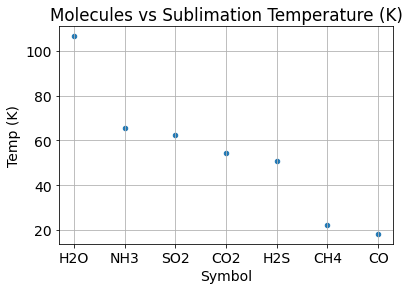

In [17]:
# Plot of Molecules vs Sublimation Temperature
df=df.dropna()
df.sort_values("Temp (K)", ascending=False).plot.scatter(x='Symbol', y='Temp (K)',grid=True);
plt.title('Molecules vs Sublimation Temperature (K)')
plt.show()

Figure 1. Plot the LCROSS observed molecules by sublimation temperature.  

In [18]:
#This is the key calculation to get the weight percent of each element. 
df_new_frame['ElementWt%']=df_new_frame['wt%']*(df_new_frame['ElementFrac%'])
df_new_frame

VolatileCompound Symbol   wt%  ... ElementRelMass  ElementFrac%  ElementWt%
0              water    H2O  5.50  ...       2.015882      0.111898    0.615441
1              water    H2O  5.50  ...      15.999405      0.888102    4.884559
2   hydrogen sulfide    H2S  0.92  ...       2.015882      0.059150    0.054418
3   hydrogen sulfide    H2S  0.92  ...      32.064800      0.940850    0.865582
4       hydrogen gas     H2  0.69  ...       2.015882      1.000000    0.690000
5    carbon monoxide     CO  0.57  ...      12.010740      0.428800    0.244416
6    carbon monoxide     CO  0.57  ...      15.999405      0.571200    0.325584
7            calcium     Ca  0.40  ...      40.078000      1.000000    0.400000
8            ammonia    NH3  0.33  ...       3.023823      0.177553    0.058593
9            ammonia    NH3  0.33  ...      14.006703      0.822447    0.271407
10           mercury     Hg  0.24  ...     200.592000      1.000000    0.240000
11         magnesium     Mg  0.19  ...      24.305100      1.000000    0.190000
12    sulfur dioxide    SO2  0.18  ...      31.998810      0.499485    0.089907
13    sulfur dioxide    SO2  0.18  ...      32.064800      0.500515    0.090093
14          ethylene   C2H4  0.17  ...      24.021480      0.856282    0.145568
15          ethylene   C2H4  0.17  ...       4.031764      0.143718    0.024432
16    carbon dioxide    CO2  0.12  ...      12.010740      0.272912    0.032749
17    carbon dioxide    CO2  0.12  ...      31.998810      0.727088    0.087251
18          methanol  CH3OH  0.09  ...      12.010740      0.374845    0.033736
19          methanol  CH3OH  0.09  ...       4.031764      0.125828    0.011325
20          methanol  CH3OH  0.09  ...      15.999405      0.499327    0.044939
21           methane    CH4  0.04  ...      12.010740      0.748682    0.029947
22           methane    CH4  0.04  ...       4.031764      0.251318    0.010053

[23 rows x 8 columns]

In [19]:
#Reorder dataframe by element weight % and group the elements. 
df_new_frame_groupby=df_new_frame.groupby(by=df_new_frame['Element']).sum().reset_index()
df_new_frame_groupby.sort_values(by="ElementWt%",ascending=False)

Element   wt%  Number  ElementRelMass  ElementFrac%  ElementWt%
6       O  6.46       7      111.995835      3.185202    5.432240
2       H  7.74      21       21.166761      1.869466    1.464261
7       S  1.10       2       64.129600      1.441365    0.955674
0       C  0.99       6       72.064440      2.681521    0.486416
1      Ca  0.40       1       40.078000      1.000000    0.400000
5       N  0.33       1       14.006703      0.822447    0.271407
3      Hg  0.24       1      200.592000      1.000000    0.240000
4      Mg  0.19       1       24.305100      1.000000    0.190000

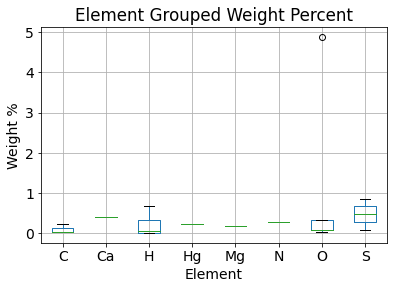

In [20]:
#Create boxplot grouped by Element Wt%
df_new_frame.boxplot(by ='Element', column =['ElementWt%']) 
plt.title("Element Grouped Weight Percent")
plt.suptitle('') # supresses the default title
plt.xlabel("Element")
plt.ylabel("Weight %")
plt.show()

Figure 2. Boxplot of the elements present in all the molecules observed in the LCROSS sample. 

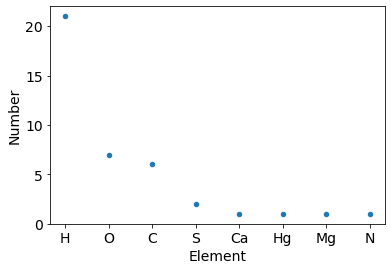

In [21]:
#Plot of element vs. number
df_new_frame_groupby.sort_values("Number", ascending=False).plot.scatter(x='Element', y='Number');
plt.show()

Figure 3. Count of the elements from all the observed molecules. 

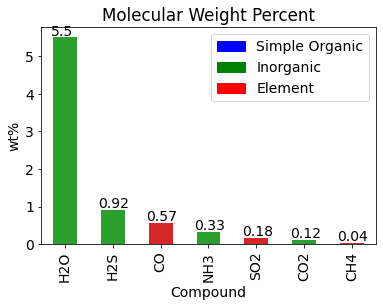

In [22]:
#Plot the Molecular Weight Percent and color code by type

'''
Plot the Molecular Weight Percent from the LCROSS impact
C0 = blue, Simple Organic
C2 = green, Inorganic
C3 = red, Element
'''

colors = {'Simple Organic':'blue', 'Inorganic':'green', 'Element':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


df.plot(x='Symbol', y='Concentration (wt%)', kind='bar', color=['C2','C2','C3','C2','C3','C2','C3','C3','C2','C0','C2','C0','C0'])  
plt.ylabel('wt%')
plt.xlabel('Compound')
plt.title('Molecular Weight Percent')
all_axes = plt.gcf().get_axes()
ax = all_axes[0]

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x()-0.05 , p.get_height()+0.05 ))
plt.legend(handles, labels)
#plt.grid()
plt.show()

Figure 4. The Molecular Weight Percent from the LCROSS impact.

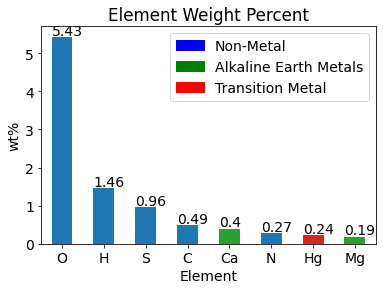

In [23]:
#Plot the Elemental Weight Percent and color code by type
'''
Plot the Elemental Weight Percent
C0 = blue, non-metal
C2 = green, alkaline earth metals
C3 = red, transition metal
'''
colors = {'Non-Metal':'blue', 'Alkaline Earth Metals':'green', 'Transition Metal':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


df_elem_sort = df_new_frame_groupby.sort_values(by="ElementWt%",ascending=False)
df_elem_sort.plot(x='Element', y='ElementWt%', kind='bar', legend=False, rot=0, color=['C0','C0','C0','C0','C2','C0','C3','C2'])  
plt.ylabel('wt%')
plt.xlabel('Element')
plt.title('Element Weight Percent')
plt.legend(handles,labels)
all_axes = plt.gcf().get_axes()
ax = all_axes[0]

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() , p.get_height()+0.05 ))
#plt.grid()
plt.show()

Figure 5. The Elemental Weight Percent from the LCROSS impact summed across the molecular components. 

These plots show that Oxygen is the most abundant element by weight percent with hydrogen a close second as expected.  However, the valuable element Carbon which was present in several molecules in small amounts is nearly 0.5% by weight in this PSR. This could be a valuable secondary commodity during the production of water for Hydrogen and Oxygen rocket fuel. It would be especially valuabe as a source of carbon to make methane for companies like SpaceX that have methane rockets. It would also be valuable as a feedstock for lunar plastics. 


##Geospatial Plotting of Lunar Rasters and Shapefile to Characterize the Cabeus Crater LCROSS impact site

We map the critical environmental characteristics of PSRs, inccluding Illumination, Temperature, Topography, and distance from the LCROSS impact site to have a semi-quantitative view of how far that "one" measurement can be extrapolated within the Cabeus crater. The Grids are plotted with the imported shapefiles for context. 

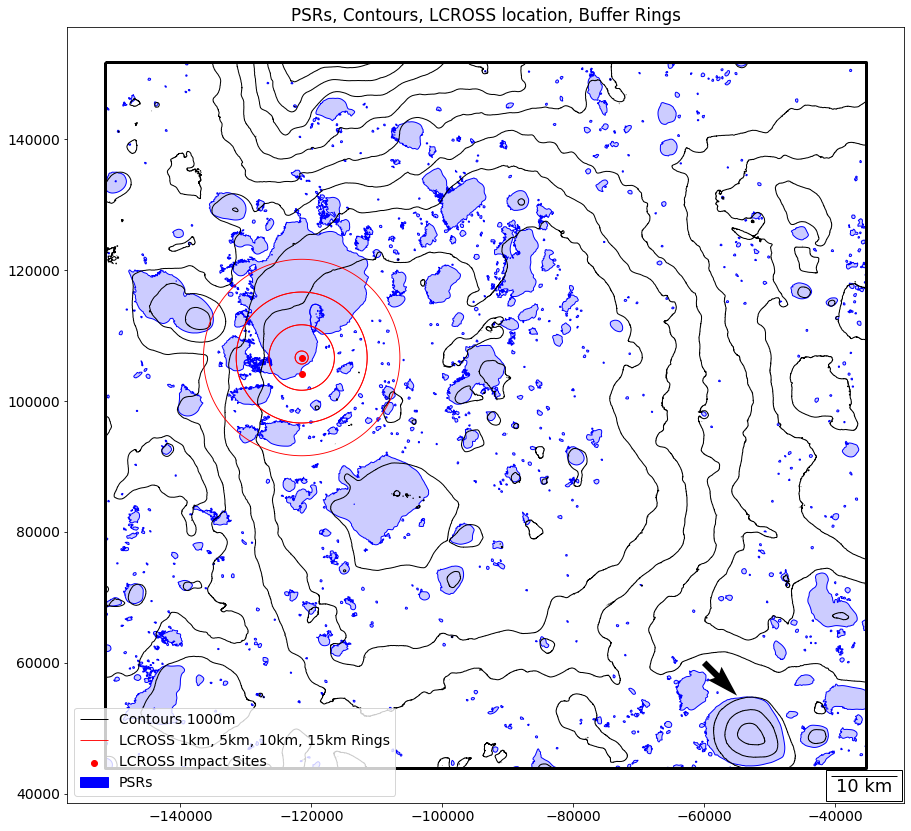

In [24]:
#Display imported shapefiles
fig, ax = plt.subplots(figsize=(15, 15))

#Shapefiles 
Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("PSRs, Contours, LCROSS location, Buffer Rings")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

blue_patch = mpatches.Patch(color='b')

handles.append(blue_patch)
labels.append('PSRs')

ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 6. The shapefiles imported from ArcGIS to provide context for the LCROSS impact site. The blue PSR blobs are the locations that have temperatres below the water stability temperature 110 K. The arrow points to Lunar South Pole.

In [25]:
# Plot the DEM and hillshade at the same time
# https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_spDEM, azimuth=315, altitude=45)

#hillshade = es.hillshade(df_avgvis, azimuth=-30, altitude=30)

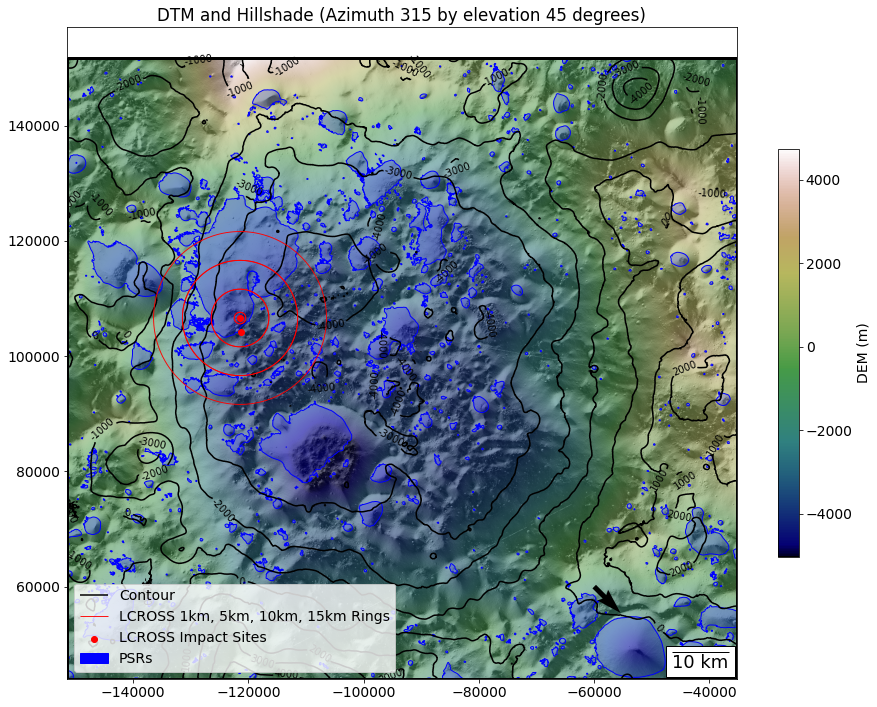

In [26]:
#Plot DEM, shapefiles, and contours
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
#ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 500)), cmap = "Greys") 
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[0].set_label('Contour')
#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()


# ep.plot_bands(
#     df_spDEM,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spDEM_plot_extent   
# )
im=ax.imshow(df_spDEM, cmap="gist_earth", extent=spDEM_plot_extent)
#im1 = ax1.imshow(f(x, y), cmap=plt.get_cmap('viridis'), animated=True)
fig.colorbar(im, ax=ax, shrink=.5, label='DEM (m)')

#Overlay hillshade with alpha transparance
ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spDEM_plot_extent)

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("DTM and Hillshade (Azimuth 315 by elevation 45 degrees)")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)


blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 7. DEM of Lunar South Pole original 10 m resampled to 20 m to reduce Colab memory load. the arrow points to the Lunar South Pole and also shows the artifical Hillshade lighting direction.  
Data Reference: 

https://pds-geosciences.wustl.edu/lro/lro-l-lola-3-rdr-v1/lrolol_1xxx/data/lola_gdr/polar/jp2/ldem_875s_10m.jp2

https://pds-geosciences.wustl.edu/lro/lro-l-lola-3-rdr-v1/lrolol_1xxx/data/lola_gdr/polar/jp2/ldem_875s_10m_jp2.lbl

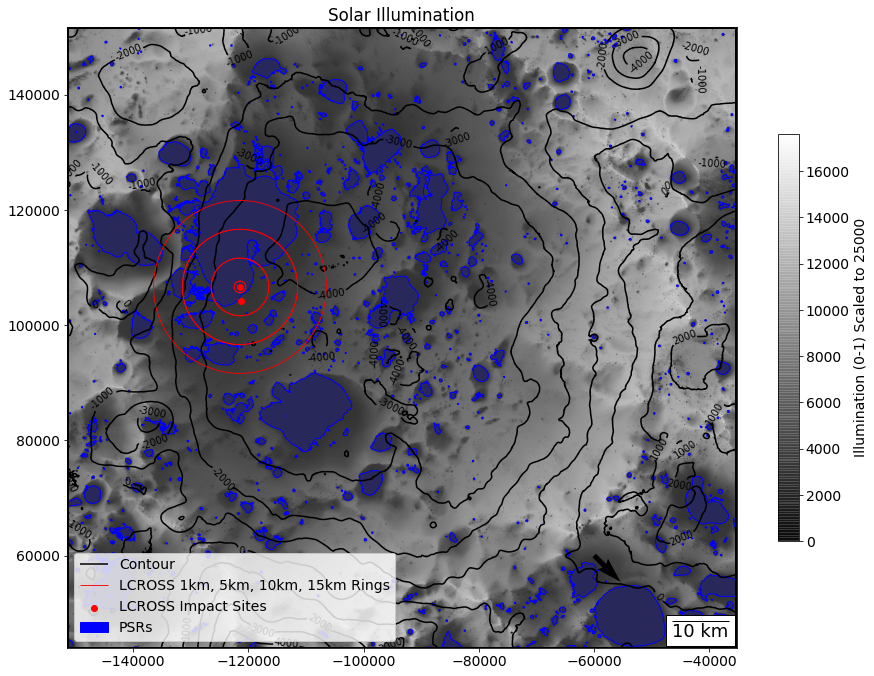

In [27]:
#plot the illumination, shapefiles, and contours
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
#ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 500)), cmap = "Greys") 
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[0].set_label('Contour')
#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

# ep.plot_bands(
#     df_avgvis,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spDEM_plot_extent   
# )
im=ax.imshow(df_avgvis, cmap="gray", extent=avgvis_plot_extent, alpha=.8)
fig.colorbar(im, ax=ax, shrink=.5, label='Illumination (0-1) Scaled to 25000')

#Overlay hillshade with alpha transparance
#ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=avgvis_plot_extent)

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("Solar Illumination")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)


blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 8. Illumination of Lunar South Pole original 60 m resampled to 20 m. Arrow points to Lunar South Pole (Mazarico, et al., 2011).

Data Reference: 

https://pgda.gsfc.nasa.gov/products/69

http://imbrium.mit.edu/EXTRAS/ILLUMINATION/JP2/AVGVISIB_85S_060M_201608.JP2


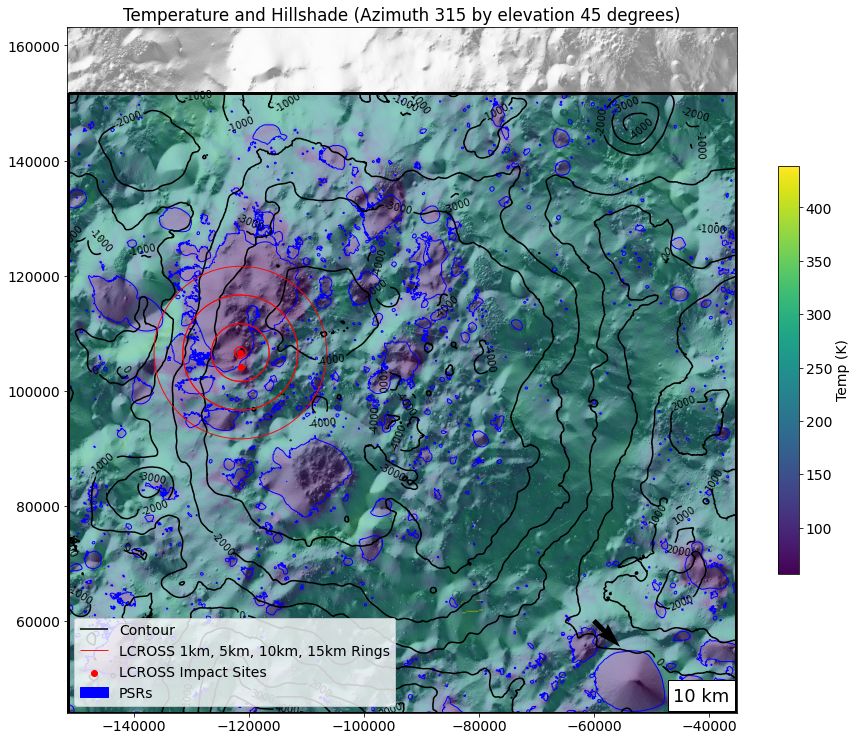

In [28]:
#Temperature, hillshade, contours, and shapefiles
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
#CStemp=ax.contour(spTempSumMax_np,  levels = list(range(0, 400, 100)), colors = "red", extent=spTempSumMax_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[0].set_label('Contour')

#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
#PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

# ep.plot_bands(
#     spTempSumMax_np,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spTempSumMax_plot_extent   
# )
im=ax.imshow(spTempSumMax_np, cmap="viridis", extent=spTempSumMax_plot_extent)
fig.colorbar(im, ax=ax, shrink=.5, label='Temp (K)')
#Overlay hillshade with alpha transparance
ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spTempSumMax_plot_extent)
#Create contour plot at specified range of values
#ax.contour(spTempSumMax_np,  levels =  list(110), color = "red",) 

scalebar = AnchoredSizeBar(ax.transData,
                           10, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("Temperature and Hillshade (Azimuth 315 by elevation 45 degrees)")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 9. Temperature of Lunar South Pole original 240 m resampled to 40 m. Arrow points to Lunar South Pole. The area in the blue shade of the PSR polygon (less than 110 K for water ice stability). To the grid north of the impact location it appears to have similar conditions further away from the LCROSS impact site. South and east of the site the conditions change within a couple of kilometers of the impact site. 

Reference:

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/additional_maps/polar_north_80_sw_max_diff.txt

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/additional_maps/polar_north_80_summer_max.txt
____________________
README for Seasonal Polar Temperatures on the Moon

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/aareadme.txt

##Statistics of Solar Illumination and Maximum Summer Temperature Grids
We performed basic statistics on the illumination and the temperature grids. They are independent data sets but should have a correlation. Where there is low solar illumination or visibility it should be colder and where the sun shines more it should be warmer. 

In [29]:
#Check the shape of the numpy arrays. If they are not the same comparisons between the grids is difficult. 
print("Shape of DEM", spDEM_np.shape, "AvgVis", avgvis_np.shape, "Temp", spTempSumMax_np.shape)

Shape of DEM (5384, 5810) AvgVis (5388, 5811) Temp (5964, 5820)


We will start with the average solar illumination illumination grid/numpy array. This defines the locations of Permanently Shadowed Regions that can act as volatile cold traps. 

In [30]:
#There are 31 million samples in the full grids and Colab crashes in the KDE calculations so we clip out 9 million grid cells for statistics. 
avgvis1k1k_np=avgvis_np[1000:4000,1000:4000]

The grid was stored as an integer in the publically available form even 
though it represents values from 0-1. T accomplish this integer format the data archivists multiplied the values by 25000. We want a percentage so we divide the grid by 25000 and multiply by 100 to give us values from 0 to 100.  

In [31]:
#Flatten the array to a vector and remove nan for simple statistics
avgvis_np_flat = np.ndarray.flatten(avgvis1k1k_np)

avgvis_np_flat = avgvis_np_flat[np.logical_not(np.isnan(avgvis_np_flat))]/25000*100 #drop the nan 
avgvis_np_flat.shape

(9000000,)

The next step took a long time to figure out. We wanted to compare random samples from each of the grids. To compare we needed the same samples from each grid. We do this by creating a indexing array and applying that to the illumination and the temperature grids. 

We may have gone overboard in the random sampling by orders of magnitude but we wanted to see how the KDE curve changed and what fine scale features in the data too small a sample might miss. 

In [32]:
#randomly subsample the flat arrays
idx1000000 = np.random.randint( 0, avgvis_np_flat.shape[0], 1000000)
idx10000 = np.random.randint( 0, avgvis_np_flat.shape[0], 10000)
idx1000 = np.random.randint( 0, avgvis_np_flat.shape[0], 1000)
idx100 = np.random.randint( 0, avgvis_np_flat.shape[0], 100)

In [33]:
#Resample the Illumination grid

avgvis_resamp1000000 = avgvis_np_flat[idx1000000]
avgvis_resamp10000 = avgvis_np_flat[idx10000]
avgvis_resamp1000 = avgvis_np_flat[idx1000]
avgvis_resamp100 = avgvis_np_flat[idx100]

#Check the data length
print('number of original illumination grid cells:',len(avgvis_np_flat))
print('length of resampled illumination:',len(avgvis_resamp1000000))
print('length of resampled illumination:',len(avgvis_resamp10000))
print('length of resampled illumination:',len(avgvis_resamp1000))
print('length of resampled illumination:',len(avgvis_resamp100))

number of original illumination grid cells: 9000000
length of resampled illumination: 1000000
length of resampled illumination: 10000
length of resampled illumination: 1000
length of resampled illumination: 100


In [34]:
#Descriptive statistics of the Solar Illumination
print("Max of illumination is {}".format(avgvis_np_flat.max()))
print("Min of illumination is {}".format(avgvis_np_flat.min()))
print("Mean of illumination is {}".format(avgvis_np_flat.mean().round(3)))
print("Median of illumination is {}".format(np.median(avgvis_np_flat)))
print("Standard Deviation of illumination is {}".format(avgvis_np_flat.std().round(3)))
print("Variance of illumination is {}".format(avgvis_np_flat.var().round(3)))

Max of illumination is 36.332
Min of illumination is 0.0
Mean of illumination is 7.529
Median of illumination is 5.4719999999999995
Standard Deviation of illumination is 7.774
Variance of illumination is 60.431


The temperature is measured by the Diviner instrument. The temperature is important to understand volatile stability in a vacuum. 

In [35]:
#We match the temperature Grid to the same area as the illumination.  
spTempSumMax1k1k_np=spTempSumMax_np[1000:4000,1000:4000]

In [36]:
# Flatten the array and remove nan 
spTempSumMax_flat = np.ndarray.flatten(spTempSumMax1k1k_np)
spTempSumMax_flat = spTempSumMax_flat[np.logical_not(np.isnan(spTempSumMax_flat))]
spTempSumMax_flat.shape

(9000000,)

In [37]:
#Resample the grid with the same random resampling index array as we used for the illumination. 

temperature_resamp1000000 = spTempSumMax_flat[idx1000000]
temperature_resamp10000 = spTempSumMax_flat[idx10000]
temperature_resamp1000 = spTempSumMax_flat[idx1000]
temperature_resamp100 = spTempSumMax_flat[idx100]

#Check the data length
print('number of original temperature grid cells:',len(spTempSumMax_flat))
print('length of resampled temperature:',len(temperature_resamp1000000))
print('length of resampled temperature:',len(temperature_resamp10000))
print('length of resampled temperature:',len(temperature_resamp1000))
print('length of resampled temperature:',len(temperature_resamp100))

number of original temperature grid cells: 9000000
length of resampled temperature: 1000000
length of resampled temperature: 10000
length of resampled temperature: 1000
length of resampled temperature: 100


In [38]:
#Descriptive statistics of the full 31 million point grid for comparison with the a resampled grid
print("Max of temperature is {}".format(spTempSumMax_flat.max()))
print("Min of temperature is {}".format(spTempSumMax_flat.min()))
print("Mean of temperature is {}".format(spTempSumMax_flat.mean().round(3)))
print("Median of temperature is {}".format(np.median(spTempSumMax_flat)))
print("Standard Deviation of temperature is {}".format(spTempSumMax_flat.std().round(3)))
print("Variance of temperature is {}".format(spTempSumMax_flat.var().round(3)))

Max of temperature is 299.0
Min of temperature is 57.0
Mean of temperature is 185.932
Median of temperature is 206.0
Standard Deviation of temperature is 61.92
Variance of temperature is 3834.083


In [39]:
#Descriptive statistics of the 1000 resample to compare values with the full population.
print("Max of temperature resample1000 is {}".format(temperature_resamp1000.max()))
print("Min of temperature resample1000 is {}".format(temperature_resamp1000.min()))
print("Mean of temperature resample1000 is {}".format(temperature_resamp1000.mean().round(3)))
print("Median of temperature resample1000 is {}".format(np.median(temperature_resamp1000)))
print("Standard Deviation of temperature resample1000 is {}".format(temperature_resamp1000.std().round(3)))
print("Variance of temperature resample1000 is {}".format(temperature_resamp1000.var().round(3)))

Max of temperature resample1000 is 293.0
Min of temperature resample1000 is 58.0
Mean of temperature resample1000 is 186.206
Median of temperature resample1000 is 207.0
Standard Deviation of temperature resample1000 is 61.173
Variance of temperature resample1000 is 3742.166


The subsample is a fairly close representation of the full data.

##Stats Plots 
The following plots describe the illumination and temperature data distributions. 

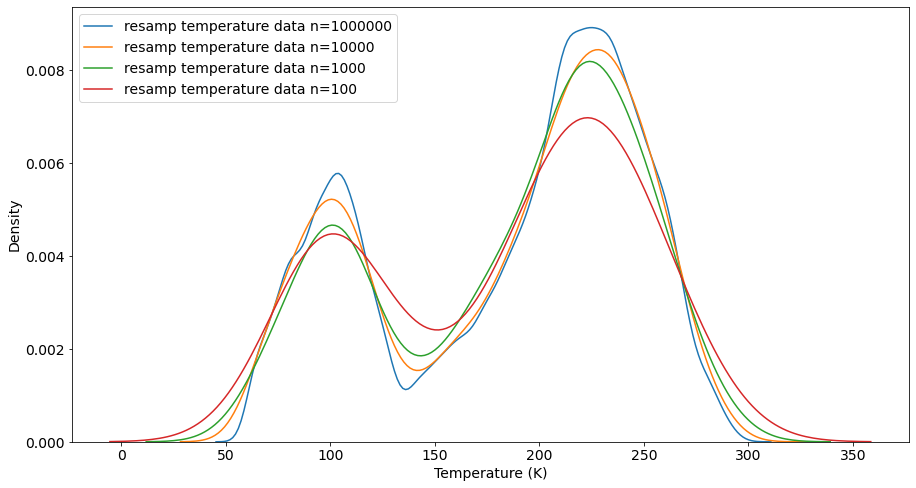

In [40]:
#Plot the temperature with the resampled data

fig = plt.subplots(figsize=[15,8])
#sns.kdeplot(spTempSumMax_flat,label='all temperature data') #All data crashes Colab

sns.kdeplot(temperature_resamp1000000, label='resamp temperature data n=1000000'); # resampled
sns.kdeplot(temperature_resamp10000, label='resamp temperature data n=10000'); # resampled
sns.kdeplot(temperature_resamp1000, label='resamp temperature data n=1000'); # resampled
sns.kdeplot(temperature_resamp100, label='resamp temperature data n=100'); # resampled
#sns.kdeplot(temperature_resamp10, label='resamp temperature data n=10'); #Too few points to be meaningful. 

plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

Figure 10. Domain implications: The dark PSRs have a temperature cluster around 100K and the sunlit areas have a wider range of temperatures. This is consistent with expectations.  

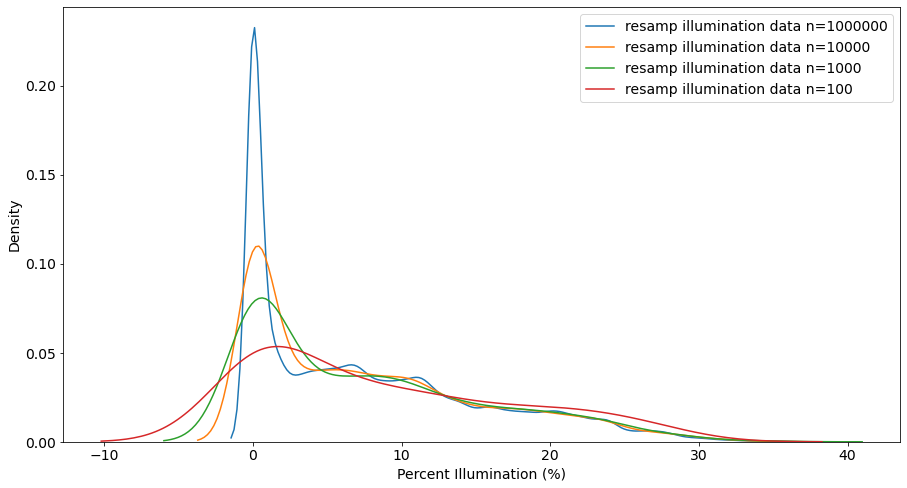

In [41]:
#Plot the illumination with the resampled data. 

fig = plt.subplots(figsize=[15,8])
#sns.kdeplot(spTempSumMax_flat,label='all temperature data') #data

sns.kdeplot(avgvis_resamp1000000, label='resamp illumination data n=1000000'); #The peak at zero is narrow and shows best with a large data set. 
sns.kdeplot(avgvis_resamp10000, label='resamp illumination data n=10000'); # resampled
sns.kdeplot(avgvis_resamp1000, label='resamp illumination data n=1000'); # resampled
sns.kdeplot(avgvis_resamp100, label='resamp illumination data n=100'); # resampled

plt.xlabel('Percent Illumination (%)')
plt.legend()
plt.show()

Figure 11. Domain implications: We chose a Permanently Shadowed Region for analysis with some of the surrounding hills. The distribution is heavily skewed to the low illumination. The negative illumination values are troubling. We believe they are an artifact of this representation. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


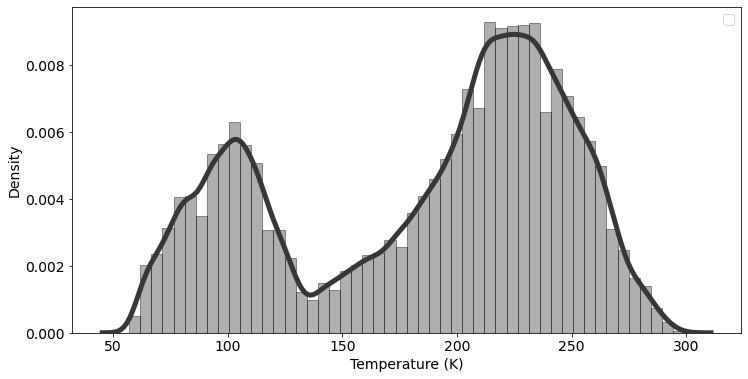

In [42]:
#The distplot function crashed Colab with the full grid. We had to use a subsampled vector to plot with the distplot function. 
fig, ax1 = plt.subplots(figsize=[12,6]) #, sharex=True)
sns.distplot(temperature_resamp1000000,ax=ax1, hist=True, color='xkcd:dark grey', hist_kws=dict(edgecolor="black"), kde_kws=dict(linewidth=5))
plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

Figure 12. KDE plot of the temperature grid showing the bi-modal distribution with a clustering around 100K that corresponds with the PSR volatile cold traps. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


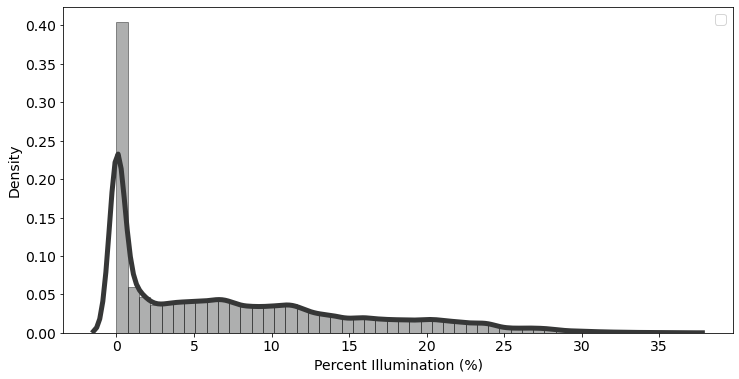

In [43]:
#The distplot function crashed Colab with the full grid. We had to use a subsampled vector to plot with the distplot function. 
fig, ax1 = plt.subplots(figsize=[12,6]) 
sns.distplot(avgvis_resamp1000000,ax=ax1, hist=True, color='xkcd:dark grey', hist_kws=dict(edgecolor="black"), kde_kws=dict(linewidth=5))
plt.xlabel('Percent Illumination (%)')
plt.legend()
plt.show()

Figure 13. KDE plot of the percent solar illumination. The Permanently Shadowed Regions (PSRs) are the near zero values.  

In [44]:
#T-test-Parametric. 
#(ttest_ind(a, b[, axis, equal_var, nan_policy]. Calculate the T-test for the means of two independent samples of scores.)

print('T-test  resampledata =',stats.ttest_ind(temperature_resamp1000000, avgvis_resamp1000000)) # 
print('T-test  resampledata =',stats.ttest_ind(temperature_resamp1000, avgvis_resamp1000),'\n') #

#K-S test-non-parametric.
#ks_2samp(data1, data2[, alternative, mode]). Compute the Kolmogorov-Smirnov statistic on 2 samples.
print('K-S test resample data =',stats.ks_2samp(temperature_resamp1000000, avgvis_resamp1000000)) #
print('K-S test resample data =',stats.ks_2samp(temperature_resamp1000, avgvis_resamp1000),'\n') #


#Third test-Parametric. levene(*args, **kwds). Perform Levene test for equal variances.
from scipy.stats import levene
print('Levene test: resample1000000 data =',stats.levene(temperature_resamp1000000, avgvis_resamp1000000))
#print('Levene test:mean.   channel resample log10 data =',stats.levene(channel_mud_resamp, channel_sand_resamp, center='mean'))  # ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
print('Levene test:median. resample1000 data =',stats.levene(temperature_resamp1000000, avgvis_resamp1000000, center='median'))# ‘median’ : Recommended for skewed (non-normal) distributions>

T-test  resampledata = Ttest_indResult(statistic=2857.477744703172, pvalue=0.0)
T-test  resampledata = Ttest_indResult(statistic=91.50795805138404, pvalue=0.0) 

K-S test resample data = Ks_2sampResult(statistic=1.0, pvalue=0.0)
K-S test resample data = Ks_2sampResult(statistic=1.0, pvalue=0.0) 

Levene test: resample1000000 data = LeveneResult(statistic=1226552.2344042854, pvalue=0.0)
Levene test:median. resample1000 data = LeveneResult(statistic=1226552.2344042854, pvalue=0.0)


We are not sure what is going on with the parametric and non-parametric tests. The odd results may result from the bimodal distribution of the temperature and the right skewed nature of the illumination. 

**In the feedback Ian recommended that we perform a Welchs T-Test. **

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
 If False, perform Welch’s t-test, which does not assume equal population variance 
 
 This is done by setting the equal_var=False
scipy.stats.ttest_ind(a, b, axis=0, equal_var=False, nan_policy='omit')

In [45]:
#scipy.stats.ttest_ind(a, b, axis=0, equal_var=False, nan_policy='omit')

print('T-test  resampledata =',stats.ttest_ind(temperature_resamp1000000, avgvis_resamp1000000, equal_var=False, nan_policy='omit')) # 
print('T-test  resampledata =',stats.ttest_ind(temperature_resamp1000, avgvis_resamp1000, equal_var=False, nan_policy='omit'),'\n') #

T-test  resampledata = Ttest_indResult(statistic=2857.477744703172, pvalue=0.0)
T-test  resampledata = Ttest_indResult(statistic=91.50795805138404, pvalue=0.0) 



Unfortunately, the results with the Welch t-test are the same as before. 

##Regressions
We performed a series of regressions on randomly sampled illumination and the temperature arrays where the random samples are spatially coregistered. 

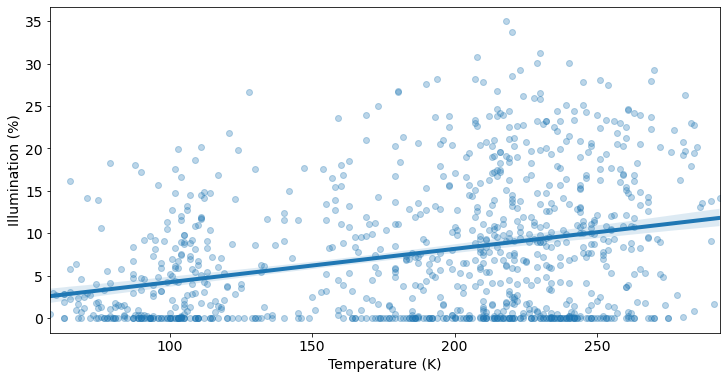

In [46]:
#Regression of temperature and illumination. 
fig = plt.subplots(figsize=[12,6]) 
 
sns.regplot(x=temperature_resamp1000,y=(avgvis_resamp1000), order=1, scatter_kws={'alpha':0.3}, line_kws={'linewidth':4})
plt.xlabel('Temperature (K)')
plt.ylabel('Illumination (%)')
plt.show()

Figure 14. First order linear fit. The lower illumination are generally showing lower temperatures which is consistent with expectations. There are a line of suspect values near the zero illumination with range of temperatures. These should be investigated. (Formatting and alpha values adjusted from Feedback)

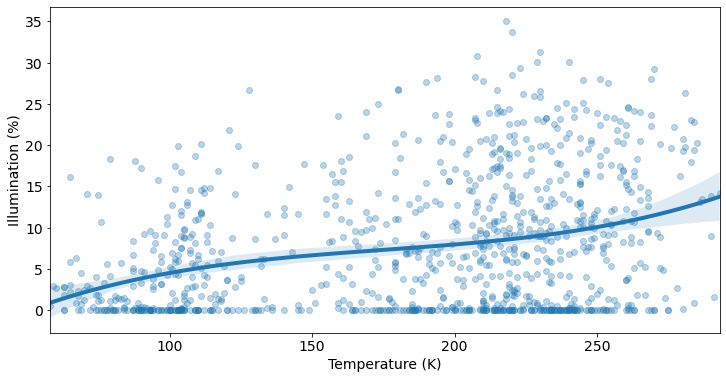

In [47]:
 #Regression of temperature and illumination.
 fig, ax1 = plt.subplots(figsize=[12,6]) 
sns.regplot(x=temperature_resamp1000,y=avgvis_resamp1000, order=3, scatter_kws={'alpha':0.3}, line_kws={'linewidth':4})
plt.xlabel('Temperature (K)')
plt.ylabel('Illumination (%)')
plt.show()

Figure 15. Regression order=3. Lower illumination are generally showing lower temperatures. The third order regression shows good directional fit particulary at the ends of the data. There is still more scatter and the suspect values near zero illumination. (Formatting and alpha values adjusted from Feedback)

###Regression Plots Summary: The regressions show some trends but there is a great deal of noise in the data. This may be a source of the trouble we had with the parametric and non-parametric tests. 

**Feedback request to try filtering out the zero illumination values.** 

In [48]:
#Create a boolian array where illumination values are greater than zero and use that as an index array for plotting the regression. 
avgvis_resamp1000_nozero=avgvis_resamp1000>=.1
#avgvis_resamp1000_nozero

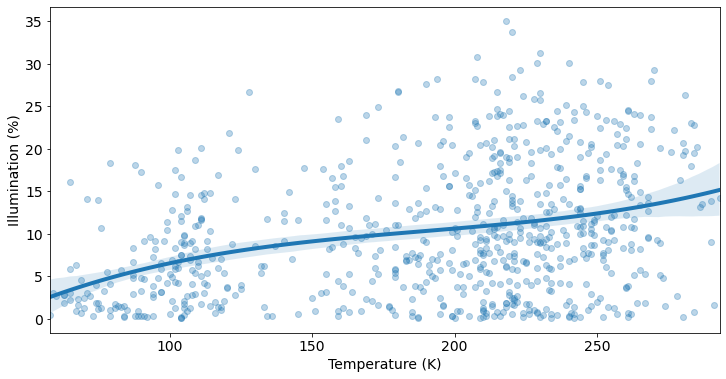

In [49]:
 #Regression of temperature and illumination with the zero illumination values removed.
 fig, ax1 = plt.subplots(figsize=[12,6]) 
sns.regplot(x=temperature_resamp1000[avgvis_resamp1000_nozero],y=avgvis_resamp1000[avgvis_resamp1000_nozero], order=3, scatter_kws={'alpha':0.3}, line_kws={'linewidth':4})
plt.xlabel('Temperature (K)')
plt.ylabel('Illumination (%)')
plt.show()

Figure 16.  Regression order=3. All zero illumination values removed based on reviewer comment. The lower illumination are trending with lower temperatures as it should although there is still a great deal of scatter. This is an interesting experiment but eliminating all zero illumination values is removing actual data in the critical Permanently Shadowed Regions. I would prefer a better data filtering solution.   

#Discussion




To achieve our goal of areas that are similar to the LCROSS impact site and then mapping out the areas that each observed species of molecule is stable we decided to classify the Diviner instrument temperature grid by the sublimation temperatures from Wang and Paige, 2009. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


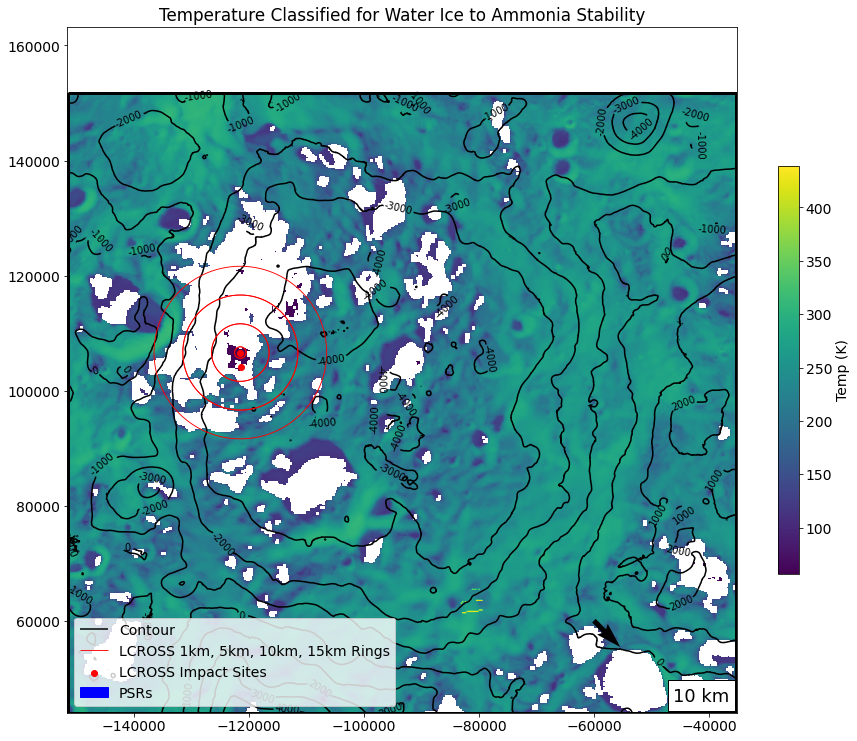

In [50]:
#Temperature classified to sublimation temperature of ammonia and water ice with hillshade, contours, and shapefiles
fig, ax = plt.subplots(figsize=(15, 15))

masked_array_water = np.ma.masked_where(((spTempSumMax_np>=65.5) & (spTempSumMax_np<110)),spTempSumMax_np)
#masked_array_water = np.ma.masked_where(((spTempSumMax_np<110)),spTempSumMax_np)
#masked_array_water = spTempSumMax_np<110

#masked_array_water=spTempSumMax_np
#masked_array_water[(masked_array_water<110)] = 400

#Create contour plot at specified range of values
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
#CStemp=ax.contour(spTempSumMax_np,  levels = list(range(0, 400, 100)), colors = "red", extent=spTempSumMax_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[0].set_label('Contour')

#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
#PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
#PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

# ep.plot_bands(
#     spTempSumMax_np,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spTempSumMax_plot_extent   
# )
im=ax.imshow(masked_array_water, cmap="viridis", extent=spTempSumMax_plot_extent)
fig.colorbar(im, ax=ax, shrink=.5, label='Temp (K)')
#Overlay hillshade with alpha transparance
#ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spTempSumMax_plot_extent)
#Create contour plot at specified range of values
#ax.contour(spTempSumMax_np,  levels =  list(110), color = "red",) 

scalebar = AnchoredSizeBar(ax.transData,
                           10, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("Temperature Classified for Water Ice to Ammonia Stability")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 17. The white areas of this map highlight a band of temperature between the ammonia sublimation temperature of 65.5K and the water sublimation temperature of 110K. It shows where water ice would be less likely to have the other constituents that exist at lower temperatures. Molecules that sublimate at warmer temperatures than 110 K would still be present. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


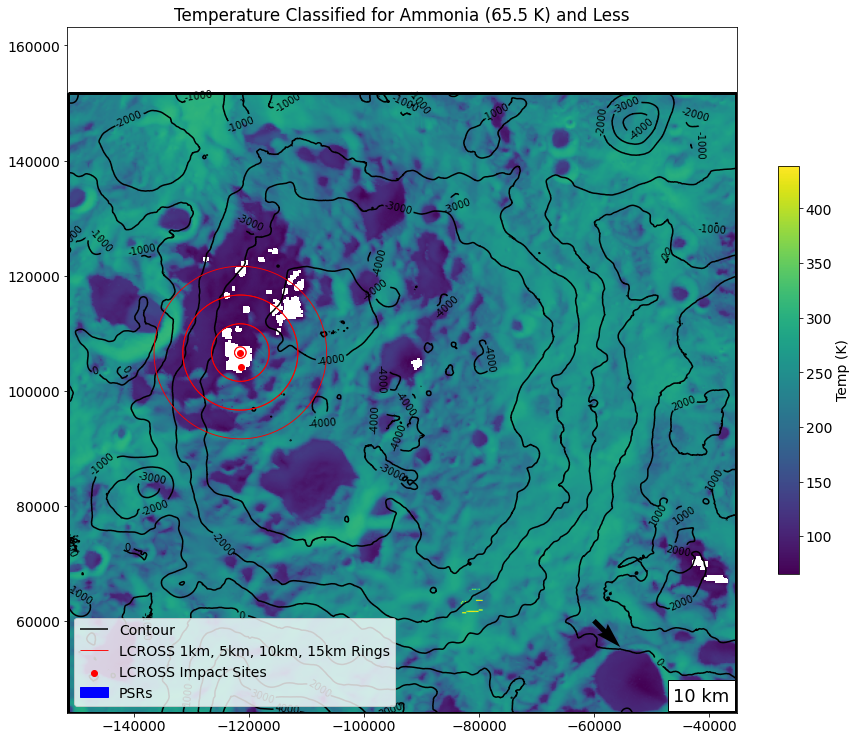

In [51]:
#Temperature classified to sublimation temperature of ammonia and less with hillshade, contours, and shapefiles
fig, ax = plt.subplots(figsize=(15, 15))

masked_array_ammonia = np.ma.masked_where(((spTempSumMax_np<65.5)),spTempSumMax_np)

#masked_array_water=spTempSumMax_np
#masked_array_water[(masked_array_water<110)] = 400

#Create contour plot at specified range of values
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
#CStemp=ax.contour(spTempSumMax_np,  levels = list(range(0, 400, 100)), colors = "red", extent=spTempSumMax_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[0].set_label('Contour')

#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
#PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
#PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

# ep.plot_bands(
#     spTempSumMax_np,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spTempSumMax_plot_extent   
# )
im=ax.imshow(masked_array_ammonia, cmap="viridis", extent=spTempSumMax_plot_extent)
fig.colorbar(im, ax=ax, shrink=.5, label='Temp (K)')
#Overlay hillshade with alpha transparance
#ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spTempSumMax_plot_extent)
#Create contour plot at specified range of values
#ax.contour(spTempSumMax_np,  levels =  list(110), color = "red",) 

scalebar = AnchoredSizeBar(ax.transData,
                           10, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("Temperature Classified for Ammonia (65.5 K) and Less")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 18. Ammonia (65.5 K) and lower. The white areas of this map highlight all temperatures below the ammonia sublimation temperature. It show where water ice would be likely to have the most other constituents. These are the areas most likely to have simple and complex carbon compounds. 

#Conclusion

The areas closest to the LCROSS impact sample site that have similar temperature and illumination conditions are most likely to have similar trapped volatile molecules. As one moves to colder or warmer temperatures the variability of composition will change as key sublimation threshold temperatures are crossed. To identify areas where there is purer water ice an exploration company would focus on the areas between the sublimation temperature of water and of the next volatile molecule in the LCROSS list ammonia Figure 16. On the other hand, if an exploration company wanted the greatest quantity of secondary simple and complex organics and other molecules it would explore in the areas shown in Figure 17.  

#References
Colaprete, A., Schultz, P., Heldmann, J., Wooden, D., Shirley, M., Ennico, K., . .. & Goldstein, D. (2010). Detection of water in the LCROSS ejecta plume. Science, 330(6003), 463-468.

Fortezzo, C. M., Spudis, P. D., & Harrel, S. L. (2020). Unified Geologic Map of the Moon.

Mazarico, E., et al. (2011), Illumination conditions of the lunar polar regions using LOLA topography, Icarus, Vol. 211, pp. 1066-1081, doi:10.1016/j.icarus.2010.10.030.

Zhang, J. A., & Paige, D. A. (2009). Cold‐trapped organic compounds at the poles of the Moon and Mercury: Implications for origins. Geophysical Research Letters, 36(16).




##Extra Stuff for a Plot

Create Nice PDF from Ian McBride

In [52]:
#Plotting Clean PDF
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [53]:

#%pwd
#%cd /content/gdrive/Shareddrives/GEOL557_Group_Project/notebooks/
#%ls


In [54]:
!jupyter nbconvert --to pdf /content/gdrive/Shareddrives/GEOL557_Group_Project/notebooks/Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13.ipynb

[NbConvertApp] Converting notebook /content/gdrive/Shareddrives/GEOL557_Group_Project/notebooks/Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13.ipynb to pdf
[NbConvertApp] Support files will be in Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13_files/
[NbConvertApp] Making directory ./Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13_files
[NbConvertApp] Making directory ./Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13_files
[NbConvertApp] Making directory ./Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13_files
[NbConvertApp] Making directory ./Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13_files
[NbConvertApp] Making directory ./Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13_files
[NbConvertApp] Making directory ./Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13_files
[NbConvertApp] Making directory ./Week7_Moon_Group_LCROSS_Grids_Documentation_Final_2020-12-13_files
[NbConvertApp] 

#Extra Stuff

#Feedback Action Items
*   Figure 2- fix the title - DONE   
*   Fix Grammar section 4.4 and 4.5 
*   Welch t-test try -Tried it. No difference. 
*   Shift data to Normal distribution before paramemetric tests - Attempted. Did not help. 
*   Increase size of figure labels on the temp and illumination statistics plots-DONE
*   For regressions try filtering value greater than 1- DONE. Minor improvment. Don't like removing real data to eliminate noise. 
*   Change alpha value on the reg plots and color the line -DONE

###Feedback Comments

Ian McBride  1 day ago
Moon Group! First off, this is such a cool project and was executed very well. I really enjoyed the structure and layout, it read like a short publication and sent me off into some of my own rabbit holes of reading about the details of the LCROSS mission... really cool, projected impact velocities of 2.5km/sec of ~2300Kg mass.... equivalent of 2 tons of TNT... Interesting to think about any changes that may have been derived had the plume been as large as anticipated.
I really only saw a few things to address:
Figure 2, maybe adjust the wt% axis scale to see those boxplots with a little more precision.
There were some grammar mistakes in 4.4 & 4.5 that I noticed.
For the 31million samples in the full illumination, Can you make a copy and 'pickle' that data and save it in the colab folder to reference? I was reading about this a couple days ago for very large data sets and have used them for a couple large sets with success... may be something to look into.
I went down another rabbit hole looking into p-values = 0 for the stats part, and am no better for it haha. Maybe a Welch t-test? but I think it has something to do with all the zero values shown in the regressions.
Maybe it's possible to null a buffer of all data less than 1 to run the test, as some of those illumination values disproportionately align with higher temps.
All in all, really good work you guys, I learned a ton, and it seems like you guys made some pretty epic progress in python! (edited) 
white_check_mark
eyes
raised_hands

Hayden Jacobson  23 hours ago
Excellent use of multiple packages, the project reads like a data driven narrative with the integrated discussions. I chose this project to review because it looked interesting, and it did not disappoint! For my final project I’m planning on converting some .las files to DEMs and doing some similar visualizations.
I’d bump on the size on some of your figure labels, especially in the temp/illumination statistics area. For the parametric and non-parametric tests, it could be worth trying to transform your data to a normal distribution before running the tests, but it would likely still return odd results due to the bimodal distribution. Finally, in 4.6, change the alpha value in the regplots and maybe the color of the line for a little more visibility.  Section 5 looks excellent. Mostly minor graphics tweaks!
New

Nataly Chacón Buitrago  17 hours ago
Moon group, I LOVE your project! I like the format you used ( Is it LaTeX?). The captions are clear and the figures and plots are descriptive and beautiful. In some of the explanations , I noticed there are notes or remainders like "NOTE I would like to sort these by temp". For the final document, you could erase those comments. (edited) 
